Classification of Text Documents using Naive Bayes method: https://www.geeksforgeeks.org/machine-learning/classification-of-text-documents-using-the-approach-of-naive-bayes/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Import data
data = pd.read_csv('../data/synthetic_text_data.csv')
X = data['text']
y = data['label']

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Use CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [5]:
# Use multinomial naive Bayes classifier on training data
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [6]:
# Use trained model to predict labels for test data (vectorized)
y_pred = model.predict(X_test_vectorized)

Accuracy = 88.235%
------------------------------
Precision = 0.881
------------------------------
Recall = 0.881
------------------------------
F1 = 0.864


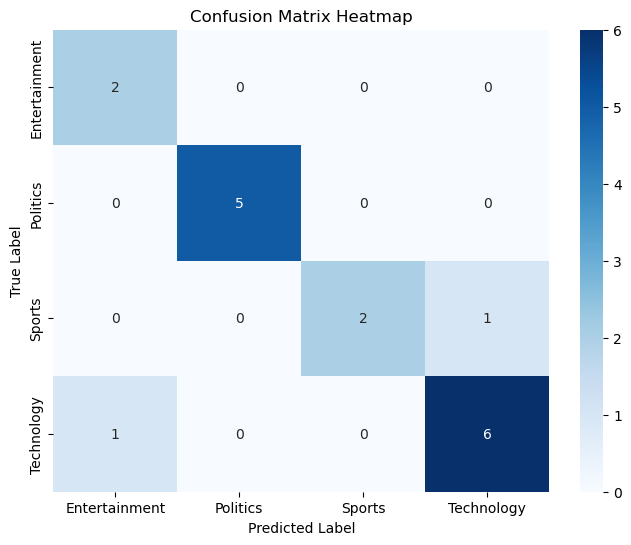

In [7]:
# Evalue model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
fone = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy = {accuracy * 100:.3f}%')
print('-' * 30)
print(f'Precision = {precision:.3f}')
print('-' * 30)
print(f'Recall = {recall:.3f}')
print('-' * 30)
print(f'F1 = {fone:.3f}') # F1 = 2 * (precision * recall) / (precision + recall), only high when both precision and recall are high

class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('../results/figures/textHeatmap.png', dpi=300, bbox_inches='tight')

plt.show()

88% accuracy in predicting the data, 2 incorrect predictions -> accuracy = trace / (sum of all matrix elements) * 100

A heat map with a strong trace and a weak sum of off diagonals is considered accurate

The confusion matrix shows a strong trace, indicating high accuracy in the classification performance.  
There is no confusion in modeling politics (all off-diagonal values for politics rows and columns = 0).
Overlap exists between sports/technology and technology/entertainment, which makes sense as articles often mention both.
The model is accurate but occassionally confuses adjacent categories.

Technology is less separable, meaning it may need more features or data.  Indicates the model confuses similar topics which is a semantic issue, not a model issue.

A confusion matrix is a good first approximation to see if the model is correctly predicting labels.  

In [8]:
# Prediction on unseen data
user_input = ("I love ...")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belons to the '{predicted_label[0]}' category.")

The input text belons to the 'Technology' category.
